LEVEL 2

TASK - 1

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Dataset .csv")

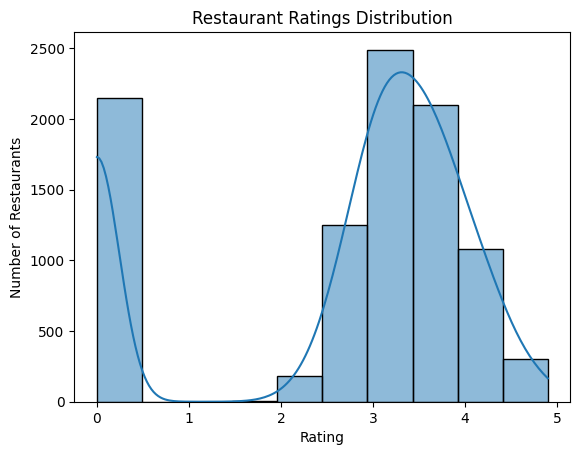

In [5]:
# Analyzing rating distribution
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Restaurant Ratings Distribution")
plt.show()


TASK -2

In [6]:
from itertools import combinations
from collections import Counter

# Split cuisine combinations
cuisine_combinations = df['Cuisines'].dropna().str.split(', ')

# Count most common pairs
pair_counts = Counter([tuple(sorted(pair)) for cuisines in cuisine_combinations for pair in combinations(cuisines, 2)])
top_combinations = pair_counts.most_common(5)

print("Top Cuisine Combinations:", top_combinations)


Top Cuisine Combinations: [(('Chinese', 'North Indian'), 1784), (('Mughlai', 'North Indian'), 832), (('Fast Food', 'North Indian'), 485), (('Continental', 'North Indian'), 468), (('Chinese', 'Fast Food'), 466)]


TASK -3

In [7]:
import folium

# Create map centered at an average location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add restaurants to the map
for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)

m.save("restaurant_map.html")
print("Map saved as restaurant_map.html")


Map saved as restaurant_map.html


TASK - 4

In [8]:
# Identify restaurant chains
chain_counts = df['Restaurant Name'].value_counts()
popular_chains = chain_counts[chain_counts > 5]  # Chains with more than 5 restaurants

# Analyze ratings for chains
chain_avg_rating = df[df['Restaurant Name'].isin(popular_chains.index)].groupby('Restaurant Name')['Aggregate rating'].mean()

print("Popular Restaurant Chains:\n", popular_chains)
print("Chain Average Ratings:\n", chain_avg_rating)


Popular Restaurant Chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Wrapss               6
TGI Friday's         6
Mainland China       6
Punjabi Rasoi        6
Southy               6
Name: count, Length: 84, dtype: int64
Chain Average Ratings:
 Restaurant Name
34, Chowringhee Lane    2.791667
Aggarwal Sweets         0.792857
Al Bake                 2.950000
Angels in my Kitchen    3.412500
Apni Rasoi              1.941667
                          ...   
Twenty Four Seven       2.147368
Wah Ji Wah              2.342105
Wow! Momo               2.754545
Wrapss                  2.566667
Yo! China               2.988889
Name: Aggregate rating, Length: 84, dtype: float64
